In [1]:
import numpy as np
import pandas as pd
import psycopg2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

In [4]:
# Check for missing values
missing_values = mydata.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps

In [8]:
# Extracting relevant columns
selected_columns = ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Selecting only the rows with non-null values in the specified columns
selected_data = mydata[selected_columns].dropna()

# Display the first few rows of the selected data
print(selected_data.head())



   Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)
0  1823652.0        36749741.0       308879636.0
1  1365104.0        53800391.0       653384965.0
2  1361762.0        27883638.0       279807335.0
3  1321509.0        43324218.0       846028530.0
4  1089009.0        38542814.0       569138589.0


/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


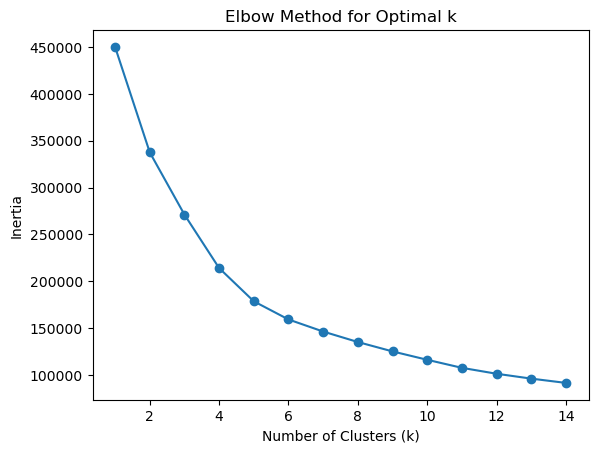

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Impute missing values with the mean for numeric columns
numeric_columns = mydata.select_dtypes(include=['float64', 'int64']).columns
mydata[numeric_columns] = mydata[numeric_columns].fillna(mydata[numeric_columns].mean())

# Normalize or standardize the data if the metrics are on different scales
columns_for_clustering = ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']
data_for_clustering = mydata[columns_for_clustering]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_for_clustering)

# Implement K-Means Clustering for Various Values of k
k_values = range(1, 15)  # You can adjust the range as needed
inertia_values = []

for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



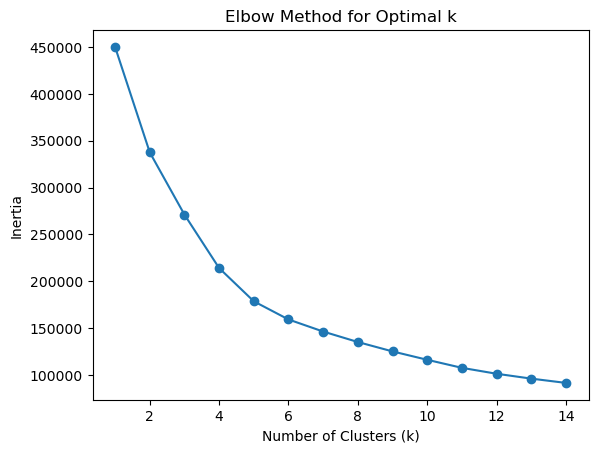

In [7]:
# ... (previous code for clustering and plotting)

# Plot the Elbow Method
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [9]:
from sklearn.cluster import KMeans

# Assume optimal_k is the value you identified using the Elbow Method
optimal_k = 3  # Replace with your identified value

# Create a KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to your standardized data
kmeans_optimal.fit(standardized_data)

# Get the cluster labels for each data point
cluster_labels = kmeans_optimal.labels_

# Add the cluster labels to your original DataFrame
mydata['Cluster'] = cluster_labels


/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:

cluster_analysis = mydata.groupby('Cluster').agg({
    'Dur. (ms)': 'mean',
    'Total UL (Bytes)': 'mean',
    'Total DL (Bytes)': 'mean',
    'Session Frequency': 'mean',
    'Average Session Duration': 'mean',
    'Total Data Usage': 'mean',
    'Session Frequency': 'mean'
}).reset_index()

# Display the characteristics of each cluster
print(cluster_analysis)
